# Growth word neighbor frequency
In which we test if growth words have different relative neighbor frequencies as compared to non-growth words.

In [4]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

## Load data

In [3]:
tf_2015_2016 = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)

In [44]:
struc_embeddings_2016_05 = Word2Vec.load_word2vec_format('../../data/embeddings/2016-05_wang2vec_100_5_embeddings', binary=True)
struc_embeddings_2016_05_vocab = set(struc_embeddings_2016_05.vocab.keys())

## Neighbor frequency

In [57]:
growth_words_2015_2016 = pd.read_csv('../../data/frequency/growth_words/2015_2016_growth_word_categories_ratio.csv', 
                          index_col=None, header=None)
growth_words_2015_2016 = sorted(reduce(lambda x,y: x+y, growth_words_2015_2016[1].apply(lambda x: str(x).split('/'))))
print(','.join(growth_words_2015_2016))

af,airburst,altspace,antifa,asf,astroturfers,atm,baity,berner,berners,berniebot,berniebots,berning,bernout,bernouts,biebs,birther,boi,boop,booped,bork,botters,bourgeoisie,boutta,bricking,bullshittery,bussy,cammer,choreo,chummy,clickbaity,collabs,comeup,credentialed,cringefest,cringeworthy,cringey,cringiest,cringy,critchance,crossplay,crybullies,cuck,cucked,cuckhold,cucking,cuckold,cuckolds,cucks,cuckservative,cuckservatives,cummies,cummy,daaamn,dabbed,dabbing,damnn,datapoints,deadass,debuffing,decarbed,decrypting,defo,destress,dgaf,dicked,diffs,doggo,doggos,dogshit,dogwhistle,droprates,drumpf,dumpstered,dutchies,dutchy,earworm,edgelord,edgey,edgy,fam,fanarts,firming,floof,floofy,flopped,flowey,flowy,flubbing,fml,forgetti,friendo,fsils,fucc,fuck,fuckbois,fuckery,fucko,fucky,fuckyou,funtime,gangbanged,gfriend,ghosted,ghosting,gope,gopers,gotchu,grinded,grinding,gtfoh,gurl,habibi,hapa,hapas,headcannon,headcanon,hella,hellscape,hilldawg,hilldog,hitlery,hmu,huffpo,huffpost,huuuge,hypebeasts

Get growth word neighbors.

TODO: should neighbors not be growth words?? Otherwise it's an easy prediction problem??

In [58]:
top_k = 10
embedding_growth_words = list(set(growth_words_2015_2016) & struc_embeddings_2016_05_vocab)
print(len(embedding_growth_words))
growth_word_neighbor_pairs = {w : struc_embeddings_2016_05.most_similar(w, topn=top_k) for w in embedding_growth_words}
growth_word_neighbors = {w : list(zip(*ns)[0]) for w,ns in growth_word_neighbor_pairs.iteritems()}

318


In [231]:
embedding_growth_words = sorted(embedding_growth_words)
print(','.join(embedding_growth_words))

af,airburst,altspace,antifa,asf,astroturfers,atm,baity,berner,berners,berniebot,berniebots,berning,bernout,biebs,birther,boi,boop,booped,bork,botters,bourgeoisie,boutta,bricking,bullshittery,bussy,cammer,choreo,chummy,clickbaity,collabs,comeup,credentialed,cringefest,cringeworthy,cringey,cringiest,cringy,critchance,crossplay,crybullies,cuck,cucked,cuckhold,cucking,cuckold,cuckolds,cucks,cuckservative,cuckservatives,cummies,cummy,daaamn,dabbed,dabbing,damnn,datapoints,deadass,debuffing,decarbed,decrypting,defo,destress,dgaf,dicked,diffs,doggo,dogshit,dogwhistle,droprates,drumpf,dumpstered,dutchies,dutchy,earworm,edgelord,edgey,edgy,fam,fanarts,firming,floof,floofy,flopped,flowey,flowy,flubbing,fml,forgetti,friendo,fucc,fuck,fuckbois,fuckery,fucko,fucky,fuckyou,funtime,gangbanged,gfriend,ghosted,ghosting,gope,gopers,gotchu,grinded,grinding,gtfoh,gurl,habibi,hapa,hapas,headcannon,headcanon,hella,hellscape,hilldawg,hilldog,hitlery,hmu,huffpo,huffpost,huuuge,hypebeasts,hyperfocus,illiberal,

In [60]:
growth_word_neighbors['af']

[u'asf',
 u'azz',
 u'mofo',
 u'enuff',
 u'mofos',
 u'dood',
 u'ass',
 u'fck',
 u'shittt',
 u'fuckk']

Plot all growth word trajectories just for sanity.

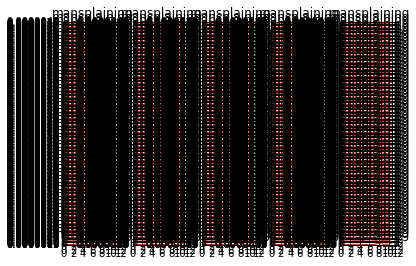

In [239]:
N = len(embedding_growth_words)
cols = 5
rows = int(N / cols) + 1
size = 4
plt.figure(figsize=(cols * size, rows * size))
X = range(tf_2015_2016_smooth.shape[1])
x_labels = sorted(tf_2015_2016.columns)
x_ticks, x_labels = zip(*zip(X, x_labels)[::4])
f, axarr = plt.subplots(rows, cols)
for r in range(rows):
    for c in range(cols):
        ax = axarr[r,c]
        ax.plot(X, tf_2015_2016_smooth.loc[g], 'r-')
        ax.set_title(g)
        ax.set_xticks(x_ticks, x_labels)
f.subplots_adjust(hspace=0.3)
plt.show()
# for i, g in enumerate(embedding_growth_words):
#     plt.subplot(rows, cols, i+1)
# plt.tight_layout()
# plt.show()

## Test correlation between growth word frequencies and neighbor frequencies
Correlation first because that's easier.

In [207]:
from scipy.stats import spearmanr

In [ ]:
top_k = 25
p_thresh = 0.05
all_valid_correls = {}
struc_embeddings_2015_06 = Word2Vec.load_word2vec_format('../../data/embeddings/2015-06_wang2vec_100_5_embeddings', binary=True)
for i, g in enumerate(growth_words):
    g_tf = tf_2015_2016.loc[g]
    neighbor_pairs = struc_embeddings_2015_06.most_similar(g, topn=top_k)
#     print('got neighbor pairs %s'%(neighbor_pairs))
    neighbors, sims = zip(*neighbor_pairs)
    correl_pval_pairs = [(n, spearmanr(g_tf, tf_2015_2016.loc[n])) for n in neighbors if n in tf_2015_2016.index]
    valid_correls = [(n, r, p) for n,(r,p) in correl_pval_pairs if p < p_thresh]
    all_valid_correls[g] = valid_correls
    if(i % 10 == 0):
        print(i)

In [206]:
test_words = ['af', 'ghosting', 'cuck', 'tbh']
for w in test_words:
    print(w)
    print(all_valid_correls[w])

af


NameError: name 'all_valid_correls' is not defined

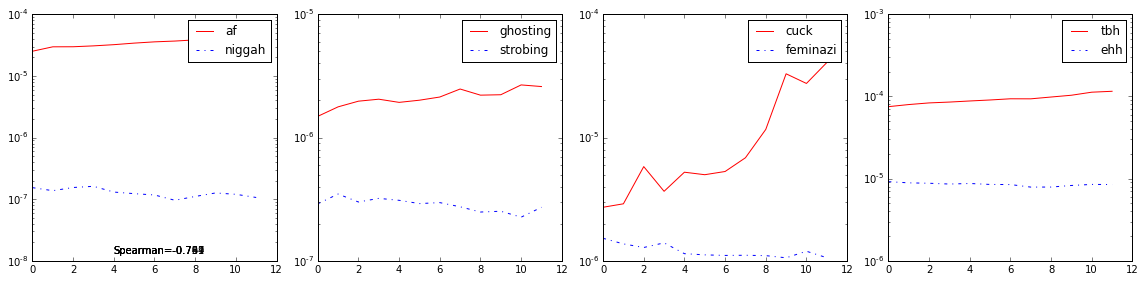

In [248]:
test_words = ['af', 'ghosting', 'cuck', 'tbh']
matches = ['niggah', 'strobing', 'feminazi', 'ehh']
X = range(tf_2015_2016.shape[1])
x_labels = sorted(tf_2015_2016.columns)
x_ticks, x_labels = zip(*zip(X, x_labels)[::4])
cols = 4
rows = int(len(test_words) / cols)
size = 4
plt.figure(figsize=(cols * size, rows * size))
for i, (w, m) in enumerate(zip(test_words, matches)):
    plt.subplot(rows, cols, i+1)
    plt.plot(X, tf_2015_2016.loc[w], 'r-', label=w)
    plt.plot(X, tf_2015_2016.loc[m], 'b-.', label=m)
    plt.legend(loc='upper right')
    plt.yscale('log')
    correl = [c for m1, c, _ in all_valid_correls[w] if m1 == m][0]
    plt.annotate('Spearman=%.3f'%(correl), xy=(0.1, 0.1), xycoords='figure fraction')
plt.tight_layout()
plt.show()

Prove that these correlations are more common among neighbors than among randomly-paired words (with similar neighbor frequency?

Also plot neighbor frequencies vs. log delta frequency (similar to Altmann et al. dissemination graphs) for all words b/c I hate myself.

Plot 

Do words with more social diffusion tend to displace fewer of their neighbors?

## Match words on initial frequency

Match each growth word with a non-growth word that has a similar initial frequency.

In [ ]:
tf_2015_2016_correls = pd.read_csv('../../data/frequency/2015_2016_tf_norm_correls.tsv', sep='\t', index_col=0)

In [ ]:
growth_word_matches = []
non_growth_vocab = struc_embeddings_2016_05_vocab - set(embedding_growth_words)
# TODO: also ensure that vocab is non-growth i.e. non-topical
tf_2015_2016_non_growth = tf_2015_2016.ix[non_growth_vocab, 0]
for i, w in enumerate(embedding_growth_words):
    match = abs(tf_2015_2016_non_growth - tf_2015_2016.ix[w, 0]).argmin()
    growth_word_matches.append(match)
    if(i % 50 == 0):
        print('%d matches'%(i))

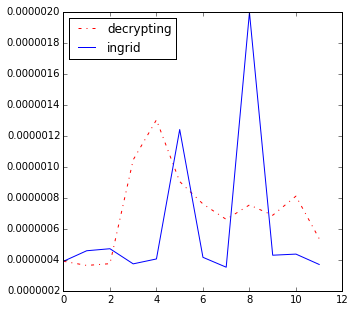

In [99]:
# plot example growth word and match
w = embedding_growth_words[2]
m = growth_word_matches[2]
X = range(tf_2015_2016.shape[1])
plt.figure(figsize=(5,5))
plt.plot(X, tf_2015_2016.loc[w], 'r-.', label=w)
plt.plot(X, tf_2015_2016.loc[m], 'b-', label=m)
plt.legend(loc='upper left')
plt.show()

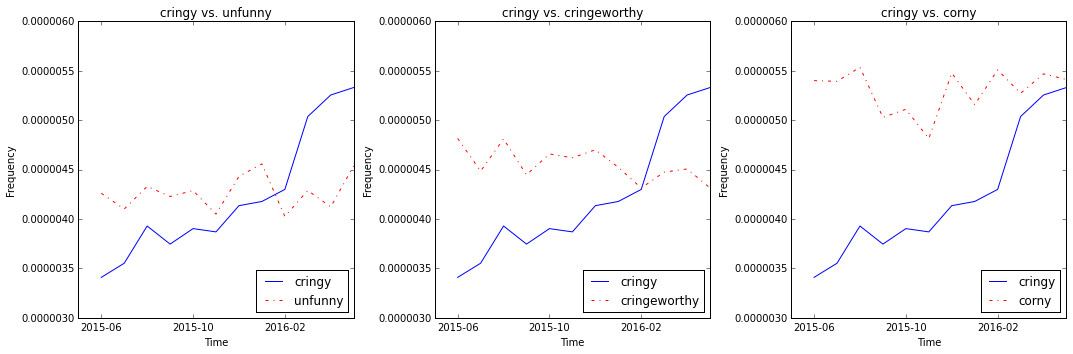

In [151]:
# example cringy plot
w = 'cringy'
pair_words = ['unfunny', 'cringeworthy', 'corny']
all_dates = sorted(tf_2015_2016.columns)
x_pos = range(1, len(all_dates)+1)
x_ticks, x_labels = zip(*(zip(x_pos, all_dates)[::4]))
plt.figure(figsize=(len(pair_words) * 5, 5))
for i, p in enumerate(pair_words):
    plt.subplot(1, len(pair_words), i+1)
    plt.plot(x_pos, tf_2015_2016.loc[w], 'b-', label=w)
    plt.plot(x_pos, tf_2015_2016.loc[p], 'r-.', label=p)
    plt.title('%s vs. %s'%(w, p))
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.legend(loc='lower right')
    plt.xticks(x_ticks, x_labels)
    plt.ylim((3e-6, 6e-6))
plt.tight_layout()
plt.show()

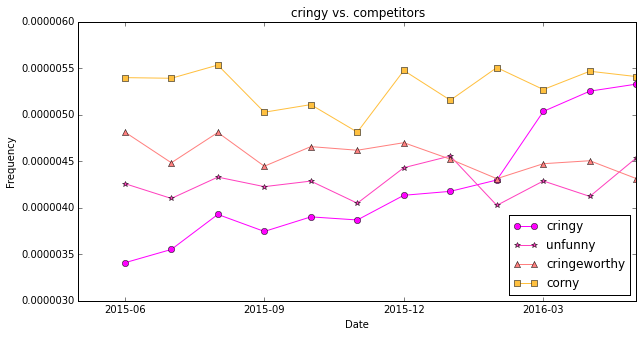

In [345]:
# combined cringy plot
from __future__ import division
w = 'cringy'
pair_words = ['unfunny', 'cringeworthy', 'corny']
all_words = [w] + pair_words
all_dates = sorted(tf_2015_2016.columns)
x_pos = range(1, len(all_dates)+1)
x_ticks, x_labels = zip(*(zip(x_pos, all_dates)[::3]))
plt.figure(figsize=(10, 5))
cmap = plt.get_cmap('spring')
markers = ['o', '*', '^', 's']
# linestyles = ['-.', '--', '-', ':']
linestyles = ['-']
for i, word in enumerate(all_words):
    if(word == w):
        color = 'r'
    else:
        color = 'b'
#     color = cmap(i / len(all_words))
    marker = markers[i % len(all_words)]
    linestyle = linestyles[i % len(linestyles)]
    plt.plot(x_pos, tf_2015_2016.loc[word], color=color, marker=marker, linestyle=linestyle, label=word)
plt.xticks(x_ticks, x_labels)
plt.legend(loc='lower right')
plt.title('%s vs. competitors'%(w))
plt.xlabel('Date')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

## Prepare neighbor tf

In [160]:
# get neighbors for matches
top_k = 10
match_neighbor_pairs = [(w, struc_embeddings_2016_05.most_similar(w, topn=top_k)) for w in growth_word_matches]
match_neighbors = [(w, ns) for w, ns in match_neighbor_pairs]
match_neighbor_dict = dict(match_neighbors)

In [123]:
print(len(match_neighbors))

318


In [161]:
# get normalized neighbor tf
tf_2015_2016_smoothr = tf_2015_2016[tf_2015_2016 > 0].min().min()
tf_2015_2016_smooth = tf_2015_2016 + tf_2015_2016_smoothr
growth_word_neighbor_tf_list = [tf_2015_2016_smooth.ix[ns, 0] / tf_2015_2016_smooth.ix[w, 0] 
                                for w, ns in growth_word_neighbors.iteritems()]
match_neighbor_tf_list = [tf_2015_2016_smooth.ix[ns, 0] / tf_2015_2016_smooth.ix[w, 0] 
                          for w, ns in match_neighbors]
growth_word_neighbor_tf = pd.np.array([x.fillna(0, inplace=False) for x in growth_word_neighbor_tf_list])
match_neighbor_tf = pd.np.array([x.fillna(0, inplace=False) for x in match_neighbor_tf_list])

In [162]:
print(growth_word_neighbor_tf.shape)
print(match_neighbor_tf.shape)
print(len(growth_word_neighbors))
print(len(match_neighbors))

(318, 10)
(318, 10)
318
318


In [87]:
w = 'af'
ns = growth_word_neighbors[w]
tf_2015_2016_smooth.ix[ns, 0] / tf_2015_2016_smooth.ix[w, 0]

asf        0.023708
azz        0.009226
mofo       0.113778
enuff      0.013010
mofos      0.032336
dood       0.057869
ass       13.590478
fck        0.050653
shittt     0.021942
fuckk      0.009074
Name: 2015-06, dtype: float64

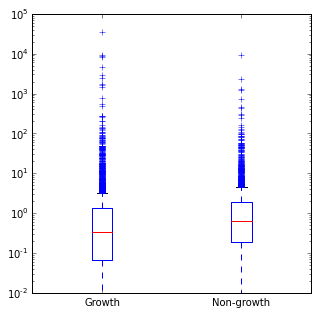

In [154]:
# need to invert ratios because we divided neighbors by word frequency
# but we're interested in word / neighbors
growth_word_neighbor_tf = 1. / pd.np.array(growth_word_neighbor_tf).flatten()
match_neighbor_tf = 1. / pd.np.array(match_neighbor_tf).flatten()
growth_word_neighbor_tf[pd.np.isinf(growth_word_neighbor_tf)] = 0
match_neighbor_tf[pd.np.isinf(match_neighbor_tf)] = 0
boxplot_data = [growth_word_neighbor_tf, match_neighbor_tf]
plt.figure(figsize=(5,5))
plt.boxplot(boxplot_data)
plt.xticks([1,2], ['Growth', 'Non-growth'])
plt.yscale('log')
plt.ylabel('Neighbor frequency')
plt.show()

In [155]:
print('growth neighbor ratios: median = %.3E, mean = %.3E +/- %.3E'%(pd.np.median(growth_word_neighbor_tf),
                                                                     pd.np.mean(growth_word_neighbor_tf), 
                                                                     pd.np.std(growth_word_neighbor_tf)))
print('non-growth neighbor ratios: median = %.3E, mean = %.3E +/- %.3E'%(pd.np.median(match_neighbor_tf),
                                                                         pd.np.mean(match_neighbor_tf), 
                                                                         pd.np.std(match_neighbor_tf)))

growth neighbor ratios: median = 3.362E-01, mean = 2.805E+01 +/- 6.888E+02
non-growth neighbor ratios: median = 6.455E-01, mean = 9.788E+00 +/- 1.949E+02


According to median, growth words tend to have lower frequency than their neighbors, which makes sense if they start low and end up high. But according to mean, growth words have higher frequency than neighbors? Must be due to the higher variance in growth words.

## Classification: growth vs. non-growth

Reframe as classification? I.e. can we predict if a word will grow based on its nearest neighbors. Order first by semantic distance and then by frequency.

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler`

In [187]:
# baseline prediction
lr = LogisticRegression()
embedding_growth_words_tf = tf_2015_2016.ix[embedding_growth_words, 0]
match_growth_words_tf = tf_2015_2016.ix[growth_word_matches, 0]
X = pd.np.hstack([embedding_growth_words_tf, match_growth_words_tf]).reshape(-1,1)
Y = pd.np.array([[1,]*len(embedding_growth_words_tf) + [0,]*len(match_growth_words_tf)]).T[:,0]
cv = 10
scores = cross_val_score(lr, X, Y, cv=cv)
print(scores)

[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]


Sanity check: including more tf data should make prediction easier.

In [196]:
# score should increase over time!
N = tf_2015_2016.shape[1]
lr = LogisticRegression()
for i in range(1, N):
    embedding_growth_words_tf = tf_2015_2016_smooth.ix[embedding_growth_words, :i]
    match_growth_words_tf = tf_2015_2016_smooth.ix[growth_word_matches, :i]
    growth_words_tf_norm = embedding_growth_words_tf.values / match_growth_words_tf.values
    match_words_tf_norm = match_growth_words_tf.values / embedding_growth_words_tf.values
    X = pd.np.vstack([growth_words_tf_norm, match_words_tf_norm])#.reshape(-1,1)
    Y = pd.np.array([[1,]*len(embedding_growth_words_tf) + [0,]*len(match_growth_words_tf)]).T[:,0]
    cv = 10
    scores = cross_val_score(lr, X, Y, cv=cv)
    print('%.3f +/- %.3f'%(pd.np.mean(scores), pd.np.std(scores)))
#     print(scores)

0.500 +/- 0.000
0.553 +/- 0.069
0.555 +/- 0.061
0.553 +/- 0.052
0.612 +/- 0.065
0.612 +/- 0.064
0.608 +/- 0.061
0.648 +/- 0.056
0.652 +/- 0.056
0.775 +/- 0.039
0.830 +/- 0.066


Logical! More frequency data => better discrimination between growth/non-growth.

### Prepare all stats

In [261]:
## prepare all stats
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import get_default_vocab
vocab = get_default_vocab()
top_k = 10
stat_names = ['f', 'D_U', 'D_S', 'D_T', 'C2', 'C3'] + ['struc_%d'%(i) for i in range(top_k)] + ['unstruc_%d'%(i) for i in range(top_k)]
tf = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0).loc[vocab]
D_U = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)
D_S = pd.read_csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
D_T = pd.read_csv('../../data/frequency/2015_2016_thread_diffusion.tsv', sep='\t', index_col=0)
C2 = pd.read_csv('../../data/frequency/2015_2016_2gram_resids.tsv', sep='\t', index_col=0)
C3 = pd.read_csv('../../data/frequency/2015_2016_3gram_resids.tsv', sep='\t' ,index_col=0)
struc_embeddings = Word2Vec.load_word2vec_format('../../data/embeddings/2015-06_wang2vec_100_5_embeddings', binary=True)
unstruc_embeddings = Word2Vec.load_word2vec_format('../../data/embeddings/2015-06_word2vec_100_5_embeddings', binary=True)


In [298]:
oov = 'OOV'
oov_sim = 0
growth_word_struc_neighbor_pairs = [struc_embeddings.most_similar(w, topn=top_k) 
                                    if w in set(struc_embeddings.vocab.keys()) else [(oov,oov_sim),] * top_k 
                                    for w in embedding_growth_words]
growth_word_unstruc_neighbor_pairs = [unstruc_embeddings.most_similar(w, topn=top_k) 
                                      if w in set(unstruc_embeddings.vocab.keys()) else [(oov,oov_sim),] * top_k
                                      for w in embedding_growth_words]
match_word_struc_neighbor_pairs = [struc_embeddings.most_similar(w, topn=top_k) 
                                   if w in set(struc_embeddings.vocab.keys()) else [(oov,oov_sim),] * top_k 
                                   for w in growth_word_matches]
match_word_unstruc_neighbor_pairs = [unstruc_embeddings.most_similar(w, topn=top_k) 
                                     if w in set(unstruc_embeddings.vocab.keys()) else [(oov,oov_sim),] * top_k
                                     for w in growth_word_matches]
growth_word_struc_neighbors = [zip(*ns)[0] for ns in growth_word_struc_neighbor_pairs]
growth_word_unstruc_neighbors = [zip(*ns)[0] for ns in growth_word_unstruc_neighbor_pairs]
match_word_struc_neighbors = [zip(*ns)[0] for ns in match_word_struc_neighbor_pairs]
match_word_unstruc_neighbors = [zip(*ns)[0] for ns in match_word_unstruc_neighbor_pairs]

In [297]:
'bernouts' in vocab

False

In [309]:
def get_median_neighbor_tf(words, neighbors, tf):
    neighbor_tf_norm_medians = {}
    for w, ns in zip(words, neighbors):
        neighbor_tf = tf.ix[ns, :]
        neighbor_tf.fillna(0, inplace=True)
        w_tf = tf.ix[w, :]
        neighbor_tf_norm = neighbor_tf / w_tf
        neighbor_tf_norm_median = neighbor_tf_norm.median(axis=0)
        neighbor_tf_norm_medians[w] = neighbor_tf_norm_median
    neighbor_tf_norm_medians = pd.DataFrame(neighbor_tf_norm_medians).transpose()
    return neighbor_tf_norm_medians

In [310]:
# get median normalized neighbor tf
all_dates = sorted(tf.columns)
tf_smoothr = tf[tf > 0.].min().min()
tf_smooth = tf + tf_smoothr
growth_word_tf_norm_medians = get_median_neighbor_tf(embedding_growth_words, growth_word_struc_neighbors, tf_smooth)
print(growth_word_tf_norm_medians.head())
match_word_tf_norm_medians = get_median_neighbor_tf(growth_word_matches, match_word_struc_neighbors, tf_smooth)
N_med_tf = pd.concat([growth_word_tf_norm_medians, match_word_tf_norm_medians])

            2015-06    2015-07   2015-08    2015-09    2015-10   2015-11  \
af         0.003322   0.005455  0.003732   0.007491   0.007281  0.007745   
airburst   6.677038   5.048075  5.490128   7.782310   9.115795  9.294999   
altspace  11.397165  12.014783  7.229988  10.888304  10.343462  8.184927   
antifa     3.208560   2.552355  1.558566   1.289449   2.114083  1.488927   
asf        0.798865   0.598409  0.549374   0.534454   0.607853  0.549677   

            2015-12    2016-01   2016-02   2016-03   2016-04   2016-05  
af         0.004905   0.005214  0.003842  0.002479  0.002991  0.002649  
airburst   8.760146   4.958239  7.276752  2.899361  4.252193  5.945613  
altspace  26.673049  27.504620  3.370121  3.129934  1.555573  0.944444  
antifa     1.212851   1.327407  1.321709  0.664843  0.955740  1.314892  
asf        0.515527   0.503425  0.562601  0.578505  0.519115  0.418713  


Combine stats into full dataframe.

In [316]:
from itertools import izip
def combine_stats(stat_names, stats, vocab):
    full_stats = pd.DataFrame()
    for i, (stat_name, stat) in enumerate(izip(stat_names, stats)):
        # reshape stats!!
        stat = stat.loc[vocab]
        stat['word'] = stat.index
        stat = pd.melt(stat, id_vars=['word'])
        stat.rename(columns={'value' : stat_name, 'variable' : 'date'}, inplace=True)
        if(i == 0):
            full_stats = full_stats.append(stat)
        else:
            full_stats = full_stats.merge(stat, on=['date', 'word'], how='inner')
    return full_stats

In [322]:
combined_words = embedding_growth_words + growth_word_matches
stat_names = (['f', 'DU', 'DS', 'DT', 'C2', 'C3', 'N_med_f'])
#               ['struc_N_%d'%(i) for i in range(top_k)] + 
#               ['unstruc_N_%d'%(i) for i in range(top_k)]
stats = [tf, D_U, D_S, D_T, C2, C3, N_med_tf]
combined_stats = combine_stats(stat_names, stats, combined_words)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [323]:
print(combined_stats.head())

       word     date             f        DU        DS        DT           C2  \
0        af  2015-06  2.520786e-05  0.926840  0.955385  0.931142   622.449399   
1  airburst  2015-06  1.348354e-07  0.920128  0.927301  0.891887   794.728983   
2  altspace  2015-06  7.632193e-08  0.876831  0.871877  0.879764  1197.011027   
3    antifa  2015-06  1.869887e-07  0.882261  0.969206  0.880973   566.505706   
4       asf  2015-06  5.965831e-07  0.970299  0.960619  0.961612   -93.641243   

            C3    N_med_f  
0 -2451.871007   0.003322  
1  2593.027439   6.677038  
2  3807.476659  11.397165  
3  1881.777553   3.208560  
4  -531.591365   0.798865  


In [207]:
# better baseline: diffusion
lr = LogisticRegression()
diffusion_types = ['user', 'subreddit', 'thread']
for diffusion_type in diffusion_types:
    print('processing type %s'%(diffusion_type))
    D = pd.read_csv('../../data/frequency/2015_2016_%s_diffusion.tsv'%(diffusion_type), sep='\t', index_col=0)
    D.fillna(0, inplace=True)
    D_smooth = D[D > 0.].min().min()
    D = D + D_smooth
    N = tf_2015_2016.shape[1]
    for i in range(1, N):
        embedding_growth_words_D = D.ix[embedding_growth_words, :i]
        match_growth_words_D = D.ix[growth_word_matches, :i]
        growth_words_D_norm = embedding_growth_words_D.values / match_growth_words_D.values
        match_words_D_norm = match_growth_words_D.values / embedding_growth_words_D.values
        X = pd.np.vstack([growth_words_D_norm, match_words_D_norm])#.reshape(-1,1)
        Y = pd.np.array([[1,]*len(embedding_growth_words) + [0,]*len(growth_word_matches)]).T[:,0]
        cv = 10
        scores = cross_val_score(lr, X, Y, cv=cv)
        print('%.3f +/- %.3f'%(pd.np.mean(scores), pd.np.std(scores)))

processing type user
0.500 +/- 0.007
0.506 +/- 0.008
0.537 +/- 0.075
0.541 +/- 0.071
0.609 +/- 0.058
0.690 +/- 0.058
0.695 +/- 0.060
0.693 +/- 0.059
0.698 +/- 0.050
0.700 +/- 0.053
0.695 +/- 0.051
processing type subreddit
0.500 +/- 0.007
0.503 +/- 0.010
0.512 +/- 0.049
0.530 +/- 0.072
0.612 +/- 0.052
0.698 +/- 0.072
0.714 +/- 0.070
0.701 +/- 0.063
0.719 +/- 0.051
0.731 +/- 0.044
0.725 +/- 0.053
processing type thread
0.500 +/- 0.007
0.506 +/- 0.008
0.490 +/- 0.040
0.492 +/- 0.044
0.588 +/- 0.027
0.700 +/- 0.050
0.700 +/- 0.058
0.690 +/- 0.053
0.704 +/- 0.040
0.708 +/- 0.035
0.701 +/- 0.048


Actually worse prediction? So frequency is better overall predictor. Although subreddit looks pretty good overall.

Another baseline: context diversity.

In [257]:
print(pd.np.any(pd.np.isinf(match_words_C_norm)))

True


In [259]:
context_types = ['2gram', '3gram']
for context_type in context_types:
    print(context_type)
    context = pd.read_csv('../../data/frequency/2015_2016_%s_resids.tsv'%(context_type), sep='\t', index_col=0)
    context.fillna(0, inplace=True)
    context_smoothr = context[context > 0.].min().min()
    context_smooth = context + context_smoothr
    N = tf_2015_2016.shape[1]
    for i in range(1, N):
        embedding_growth_words_C = context_smooth.ix[embedding_growth_words, :i].fillna(context_smoothr, inplace=False)
        match_growth_words_C = context_smooth.ix[growth_word_matches, :i].fillna(context_smoothr, inplace=False)
        growth_words_C_norm = embedding_growth_words_C.values / match_growth_words_C.values
        match_words_C_norm = match_growth_words_C.values / embedding_growth_words_C.values
        X = pd.np.vstack([growth_words_C_norm, match_words_C_norm])#.reshape(-1,1)
        Y = pd.np.array([[1,]*len(embedding_growth_words) + [0,]*len(growth_word_matches)]).T[:,0]
        cv = 10
        scores = cross_val_score(lr, X, Y, cv=cv)
        print('%.3f +/- %.3f'%(pd.np.mean(scores), pd.np.std(scores)))

2gram
0.500 +/- 0.000
0.505 +/- 0.057
0.519 +/- 0.067
0.528 +/- 0.074
0.537 +/- 0.031
0.511 +/- 0.053
0.550 +/- 0.077
0.549 +/- 0.062
0.557 +/- 0.065
0.514 +/- 0.035
0.527 +/- 0.039
3gram
0.500 +/- 0.000
0.478 +/- 0.027
0.490 +/- 0.072
0.493 +/- 0.081
0.531 +/- 0.075
0.533 +/- 0.059
0.544 +/- 0.048
0.533 +/- 0.042
0.517 +/- 0.046
0.527 +/- 0.065
0.523 +/- 0.048


Now use neighbor frequency.

In [200]:
# neighbor prediction
lr = LogisticRegression()
X1 = pd.np.vstack([growth_word_neighbor_tf, match_neighbor_tf])
X2 = pd.np.vstack([embedding_growth_words_tf, match_growth_words_tf])#.reshape(-1,1)
print(X1.shape)
print(X2.shape)
X = pd.np.hstack([X1, X2])
X = MinMaxScaler().fit_transform(X)
Y = pd.np.array([[1,]*len(growth_word_neighbor_tf) + [0,]*len(match_neighbor_tf)]).T[:,0]
cv = 10
scores = cross_val_score(lr, X, Y, cv=cv)
print('%.3f +/- %.3f'%(pd.np.mean(scores), pd.np.std(scores)))
# print(scores)

(636, 10)
(636, 11)
0.632 +/- 0.036


## Combined stat prediction

In [1]:
import pandas as pd
from gensim.models import Word2Vec

In [2]:
growth_words = pd.read_csv('../../data/frequency/growth_words/2015_2016_growth_words_clean.csv', index_col=False)
growth_words = growth_words['words'][0].split('/')
print(len(growth_words))
print(sorted(growth_words))

1184
['abetted', 'abjectly', 'accosting', 'acidosis', 'acks', 'acquiescing', 'adblocker', 'adblockers', 'adhesions', 'adlibs', 'adventurism', 'af', 'airburst', 'airdrop', 'airdrops', 'airgun', 'algs', 'altspace', 'amalgamate', 'ammos', 'anglerfish', 'anhydrous', 'anology', 'anotha', 'antifa', 'antinatalism', 'antinatalist', 'antiquarian', 'antiwar', 'apportion', 'apportioned', 'arranger', 'asf', 'assinine', 'asst', 'astroturfers', 'async', 'atm', 'attesting', 'augs', 'autism', 'automagically', 'aviable', 'awaking', 'ayye', 'babyyy', 'backdated', 'backlink', 'backpay', 'backported', 'backtracks', 'badman', 'baity', 'balloting', 'banrate', 'bantz', 'bartard', 'bby', 'beasting', 'beatdown', 'beatdowns', 'beaut', 'bec', 'beep', 'believeth', 'belter', 'belters', 'berthing', 'biebs', 'binged', 'binging', 'bioload', 'birther', 'bitting', 'blackscreen', 'blathers', 'blendable', 'blep', 'blockable', 'blocker', 'blockers', 'blowout', 'blowouts', 'blustering', 'blustery', 'bodying', 'boi', 'bois'

In [3]:
# filter words for embedding vocab
embeddings = Word2Vec.load_word2vec_format('../../data/embeddings/2015-06_wang2vec_100_5_embeddings', binary=True)
embedding_vocab = set(embeddings.vocab.keys())
growth_words = list(set(growth_words) & embedding_vocab)
print(len(growth_words))
print(sorted(growth_words))

1166
['abetted', 'abjectly', 'accosting', 'acidosis', 'acks', 'acquiescing', 'adblocker', 'adblockers', 'adhesions', 'adlibs', 'adventurism', 'af', 'airburst', 'airdrop', 'airdrops', 'airgun', 'algs', 'altspace', 'amalgamate', 'ammos', 'anglerfish', 'anhydrous', 'anology', 'anotha', 'antifa', 'antinatalism', 'antinatalist', 'antiquarian', 'antiwar', 'apportion', 'apportioned', 'arranger', 'asf', 'assinine', 'asst', 'astroturfers', 'async', 'atm', 'attesting', 'augs', 'autism', 'automagically', 'aviable', 'awaking', 'ayye', 'babyyy', 'backdated', 'backlink', 'backpay', 'backported', 'backtracks', 'badman', 'baity', 'balloting', 'banrate', 'bantz', 'bartard', 'bby', 'beasting', 'beatdown', 'beatdowns', 'beaut', 'bec', 'beep', 'believeth', 'belter', 'belters', 'berthing', 'biebs', 'binged', 'binging', 'bioload', 'birther', 'bitting', 'blackscreen', 'blathers', 'blendable', 'blep', 'blockable', 'blocker', 'blockers', 'blowout', 'blowouts', 'blustering', 'blustery', 'bodying', 'boi', 'bois'

In [4]:
# match growth words
def match_word(tf_w, tf):
    match = abs(tf_w - tf).argmin()
    return match
def match_words(words, tf, candidates=None):
    if(candidates is None):
        candidates = set(tf.index) - set(words)
    candidate_tf = tf.loc[candidates]
    matches = []
    for i, w in enumerate(words):
        tf_w = tf.loc[w]
        match = match_word(tf_w, candidate_tf)
        # get rid of match
        candidate_tf.drop(match, inplace=True)
        matches.append(match)
        if(i % 100 == 0):
            print(i)
    return matches

In [10]:
# TODO: cut down candidates with Spearman??
# correls = pd.read_csv('../../data/frequency/2015_2016_tf_correls.tsv', sep='\t', index_col=0)
# non_growth_upper = 0.3
# candidates = correls[correls['correl'] <= non_growth_upper].index.tolist()
# match_words = match_words(growth_words, tf_2015_2016.ix[:,0], candidates=candidates)
tf_2015_2016 = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)
from time import time
start = time()
tf_2015_2016_valid = tf_2015_2016.ix[embedding_vocab, 0]
candidates = set(tf_2015_2016_valid.index) - set(growth_words)
matched_words = match_words(growth_words, tf_2015_2016_valid, candidates)
print('%.3f sec/word'%((time() - start) / len(matched_words)))

0
100
200
300
400
500
600
700
800
900
1000
1100
0.085 sec/word


In [11]:
print(len(matched_words))
print(len(set(matched_words)))
print(matched_words)

1166
1166
[u'droped', u'leases', u'wans', u'venden', u'machs', u'globbyy', u'rbf', u'vivillion', u'engg', u'bips', u'sunbeams', u'tyre', u'zucker', u'protags', u'ofte', u'leroux', u'kiloton', u'magickal', u'accually', u'lovecas', u'salad', u'ugghhh', u'mifi', u'trickery', u'televangelists', u'afterglow', u'biab', u'stormtrance', u'dashboard', u'uptiered', u'torched', u'pariston', u'conciously', u'gastroparesis', u'halbs', u'tresspassing', u'exonerating', u'haran', u'majid', u'footnotes', u'rechecking', u'platt', u'knc', u'astroglide', u'ravenously', u'susana', u'pursuit', u'tillamook', u'siete', u'brutal', u'loren', u'deepthroating', u'kinsella', u'ciudades', u'torpedoes', u'zob', u'alai', u'rifting', u'fishbone', u'jera', u'goggins', u'coke', u'maata', u'tsukai', u'gnr', u'tamara', u'voicework', u'aaannd', u'cashews', u'shaitan', u'varient', u'starfleet', u'westy', u'ptr', u'precluding', u'dragonbone', u'miia', u'irt', u'colonnade', u'dnr', u'emg', u'nibbling', u'alexandrian', u'ergot

Get neighbor frequency.

In [48]:
# get neighbor frequency
from ast import literal_eval
# all_neighbors = pd.read_csv('../../data/embeddings/2015-06_wang2vec_100_5_nearest_neighbors.tsv', sep='\t', index_col=0)
# all_neighbors = all_neighbors.apply(lambda x: list(x.apply(lambda y: literal_eval(y)[0])), axis=1)
# print(all_neighbors.head())
neighbor_tf = pd.read_csv('../../data/frequency/2015-06_neighbor_2015-06_tf_norm.tsv', sep='\t', index_col=0)
neighbor_tf.columns = sorted(tf_2015_2016.columns)[:neighbor_tf.shape[1]]
neighbor_tf = neighbor_tf.applymap(literal_eval)
print(neighbor_tf.head())

                                                  2015-06
aa      [2.77175801292e-06, 0.0001742480494, 0.0001445...
aaa     [3.6888931792e-07, 1.41577176153e-06, 1.042303...
aaages  [5.32752497004e-05, 6.24822182628e-06, 3.33272...
aaagh   [2.22605622883e-06, 3.96874024797e-07, 3.72705...
aaah    [2.79338255915e-05, 2.0098107666e-06, 2.172122...


In [21]:
pd.np.array(neighbor_tf.ix[0,0])

array([  2.77175801e-06,   1.74248049e-04,   1.44537195e-04,
         5.89777697e-05,   2.56950490e-07,   1.22115085e-07,
         2.11030130e-06,   7.31418475e-07,   1.78084498e-08,
         1.09394763e-07])

In [109]:
def get_stat_norm(neighbor_stat, stat):
    all_dates = sorted(neighbor_stat.columns)
    stat_norm = []
    for d in all_dates:
        neighbor_stat_d = neighbor_stat.ix[:, d].apply(lambda x: pd.Series(x))
        stat_d = stat.ix[:, d]
        neighbor_stat_d = neighbor_stat_d.div(stat_d, axis=0)
        neighbor_stat_d = pd.Series(dict(zip(neighbor_stat_d.index, (r for r in neighbor_stat_d.values))))
        stat_norm.append(neighbor_stat_d)
    stat_norm = pd.concat(stat_norm, axis=1)
    return stat_norm

In [115]:
def get_stat_summary(neighbor_stat, stat, summary_stat=pd.np.median):
    """
    Normalize neighbor stats by corresponding
    word stat, then compute summary stat over
    normalized stats.
    """
    stat_norm = get_stat_norm(neighbor_stat, stat)
#     stat_median = stat_norm.applymap(pd.np.median)
    stat_median = stat_norm.applymap(lambda x: summary_stat(pd.Series(x).dropna(inplace=False)))
    stat_median.columns = sorted(neighbor_stat.columns)
    return stat_median

In [116]:
# normalize by original term frequency, then get median
all_words = growth_words + matched_words
# print(neighbor_tf.loc[all_words[:100]].apply(lambda x: pd.np.array(x), axis=1).head())
# neighbor_tf_norm = (neighbor_tf.loc[all_words[:5]].apply(lambda x: x.values[0], axis=1))
# print(neighbor_tf_norm)
# neighbor_tf_norm = []
# all_dates = sorted(neighbor_tf.columns)
# for d in all_dates:
#     neighbor_tf_d = neighbor_tf.ix[all_words, d].apply(lambda x: pd.Series(x))
# #     print(neighbor_tf_d.head())
#     tf_d = tf_2015_2016.ix[all_words, d]
# #     print(tf_d.head())
#     neighbor_tf_d = neighbor_tf_d.div(tf_d, axis=0)
#     # collapse to a list...again
#     neighbor_tf_d = pd.Series(dict(zip(all_words, (r for r in neighbor_tf_d.values))))
#     neighbor_tf_norm.append(neighbor_tf_d)
# neighbor_tf_norm = pd.concat(neighbor_tf_norm, axis=1)
# neighbor_tf_norm = get_stat_norm(neighbor_tf, tf_2015_2016)
summary_stat = pd.np.median
neighbor_tf_median = get_stat_summary(neighbor_tf.ix[all_words,:], tf_2015_2016.ix[all_words,:], summary_stat=summary_stat)
# print(neighbor_tf_norm.head())
# test_word = 'proletariat'
# print(neighbor_tf_norm.loc[test_word])
# print(neighbor_tf.ix[test_word, 0])
# print(tf_2015_2016.ix[test_word, 0])
# print(neighbor_tf.ix[test_word, 0] / tf_2015_2016.ix[test_word, 0])

In [117]:
print(neighbor_tf_median.head())
print(neighbor_tf_median.sort_values(neighbor_tf_median.columns[0], ascending=False))

           2015-06
aaannd   13.604167
aadhar    5.151163
abba      0.163265
abbi      1.570175
abetted   6.639241
                 2015-06
gopers        295.672131
electorally   193.016129
foriegn       189.907186
worlders      187.031847
unfucked      171.123853
flordia       153.875000
grandmom      149.795918
pigsty        147.007692
qotd          140.421512
memebers      127.522727
anology       100.601124
naiive         91.510309
leaners        89.513333
intrests       83.023364
trouncing      79.821429
assinine       78.093333
repub          74.213270
nonwhites      74.129921
capably        72.844086
conection      71.887850
cellspot       71.598214
corporatists   69.847561
flubbing       69.433333
sexus          67.839286
dogwhistle     67.143382
thoe           64.146667
veterancy      60.226415
reentered      59.771605
rechecking     57.565000
rerunning      56.000000
...                  ...
sensitivity     0.076980
camo            0.076395
havent          0.074917
shitpost   

Slang neighbors (`shill`) tend to be less frequent than the slang itself, and the more standard words like `capably` have higher neighbor frequency.

Compare median distance for growth vs. non-growth words.

In [174]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

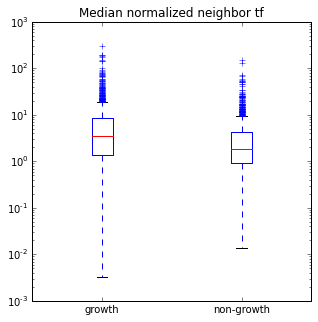

growth word median 3.481
non-growth word median 1.824


In [180]:
plt.figure(figsize=(5,5))
plt.boxplot([neighbor_tf_median.loc[growth_words], neighbor_tf_median.loc[matched_words]])
plt.yscale('log')
plt.xticks([1,2], ['growth', 'non-growth'])
plt.title('Median normalized neighbor tf')
plt.show()
print('growth word median %.3f'%(neighbor_tf_median.loc[growth_words].median()))
print('non-growth word median %.3f'%(neighbor_tf_median.loc[matched_words].median()))

Growth words tend to have slightly HIGHER frequency than their nearest neighbors as compared to non-growth words. HMM.

## Gather all stats

Combine all stats.

In [ ]:
# combine all stats
from itertools import izip
def combine_stats(stat_names, stats, vocab):
    full_stats = pd.DataFrame()
    for i, (stat_name, stat) in enumerate(izip(stat_names, stats)):
        # reshape stats!!
        stat = stat.loc[vocab]
        stat['word'] = stat.index
        stat = pd.melt(stat, id_vars=['word'])
        stat.rename(columns={'value' : stat_name, 'variable' : 'date'}, inplace=True)
        if(i == 0):
            full_stats = full_stats.append(stat)
        else:
            full_stats = full_stats.merge(stat, on=['date', 'word'], how='inner')
    return full_stats

In [118]:
from itertools import izip
def combine_stats_simple(stat_names, stats):
    full_stats = pd.DataFrame()
    for i, (stat_name, stat) in enumerate(izip(stat_names, stats)):
        full_stats[stat_name] = stat
    return full_stats

In [131]:
all_words = growth_words + matched_words
D_U = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)
D_S = pd.read_csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
D_T = pd.read_csv('../../data/frequency/2015_2016_thread_diffusion.tsv', sep='\t', index_col=0)
C2 = pd.read_csv('../../data/frequency/2015_2016_2gram_resids.tsv', sep='\t', index_col=0)
C3 = pd.read_csv('../../data/frequency/2015_2016_3gram_resids.tsv', sep='\t', index_col=0)
all_dates = sorted(tf_2015_2016.columns)
date_idx = 0
stats = [tf_2015_2016, D_U, D_S, D_T, C2, C3, neighbor_tf_median]
stats = [s.ix[all_words, date_idx] for s in stats]
stat_names = ['f', 'DU', 'DS', 'DT', 'C2', 'C3', 'N_f']
all_stats = combine_stats_simple(stat_names, stats)

In [132]:
print(all_stats.head())
print(pd.np.any(pd.np.isnan(all_stats)))
print(all_stats[all_stats.isnull().any(axis=1)])

                          f        DU        DS        DT           C2  \
mils           3.459927e-07  0.869085  0.920300  0.903602   100.496710   
proletariat    2.119206e-06  0.811828  0.851984  0.811860 -1053.691787   
equalities     9.921851e-08  0.952148  0.961905  0.921674   957.409892   
savescumming   1.030346e-07  0.970418  0.899085  0.962700   938.180557   
collectivists  8.522615e-08  0.973516  0.908456  0.934933  1074.129363   

                        C3        N_f  
mils            474.120462   3.104779  
proletariat   -3396.487102   0.942077  
equalities     3209.937791  17.160256  
savescumming   3128.455370   2.567901  
collectivists  3549.240786  15.574627  
False
Empty DataFrame
Columns: [f, DU, DS, DT, C2, C3, N_f]
Index: []


Difference the positive and negative examples.

In [144]:
from random import random
def get_differenced_data(pos_words, neg_words, stats):
    """
    Get differenced data from positive and 
    negative examples (f(p) - f(n)). 
    Randomly switch order of positive and negative to 
    approximately balance classes.
    
    Parameters:
    -----------
    pos_words : [str]
    neg_words : [str]
    stats : pandas.DataFrame
    Rows = words, cols = stats.
    
    Returns:
    X : pandas.DataFrame
    Rows = words, cols = stats.
    Y : 
    """
    X = []
    Y = []
    for p, n in izip(pos_words, neg_words):
        if(random() < 0.5):
            x = stats.loc[p] - stats.loc[n]
            y = 1
        else:
            x = stats.loc[n] - stats.loc[p]
            y = 0
        X.append(x)
        Y.append(y)
#     X = pd.DataFrame(X)
    X = pd.concat(X, axis=1).transpose()
    Y = pd.Series(Y)
    return X, Y

In [50]:
t1 = all_stats.loc[growth_words[0]] - all_stats.loc[matched_words[0]]
t2 = all_stats.loc[growth_words[0]] - all_stats.loc[matched_words[0]]
t3 = pd.DataFrame([t1, t2])
print(t3)

     f        DU        DS        DT    C2    C3           N_f
0  0.0 -0.117221 -0.099921 -0.071806 -10.0 -33.0  8.490814e-07
1  0.0 -0.117221 -0.099921 -0.071806 -10.0 -33.0  8.490814e-07


In [193]:
X, Y = get_differenced_data(growth_words, matched_words, all_stats)
print(X.head())
print(Y.head())

     f        DU        DS        DT     C2     C3        N_f
0  0.0 -0.117221 -0.099921 -0.071806  -10.0  -28.0   2.454044
1  0.0 -0.096109 -0.103766 -0.105260 -215.0 -543.0  -0.969388
2  0.0  0.070011  0.093088  0.052667  -12.0   -8.0  10.852564
3  0.0 -0.013478  0.059939 -0.038001  -15.0   -2.0  -1.172840
4  0.0  0.007878  0.043043  0.035333   14.0   10.0 -14.007463
0    1
1    1
2    1
3    0
4    0
dtype: int64


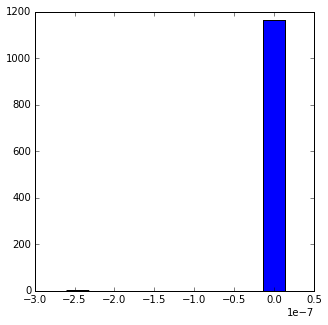

In [185]:
# sanity check: f should be near zero for all samples
plt.figure(figsize=(5,5))
plt.hist(X['f'])
plt.show()

OK. There's a few pairs that have a noticeable frequency difference.

In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [195]:
print(X.head())

          f        DU        DS        DT        C2        C3       N_f
0  0.772727  0.269084  0.290257  0.319082  0.663079  0.205176  0.610062
1  0.772727  0.286571  0.287145  0.291364  0.653223  0.199618  0.602990
2  0.772727  0.424165  0.446497  0.422208  0.662982  0.205392  0.627409
3  0.772727  0.355013  0.419663  0.347089  0.662838  0.205456  0.602570
4  0.772727  0.372702  0.405986  0.407846  0.664232  0.205586  0.576059


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
lr = LogisticRegression()
cv = 10
scores = cross_val_score(lr, X, Y, cv=cv)
print(scores)
print('mean score: %.3E +/- %.3E'%(scores.mean(), scores.std()))

[ 0.70338983  0.63559322  0.77118644  0.69827586  0.63793103  0.63793103
  0.62931034  0.61206897  0.65517241  0.63793103]
mean score: 6.619E-01 +/- 4.582E-02


Overall the prediction isn't terrible.

What do the feature weights tell us?

In [200]:
X_const = add_constant(X)
lr.fit(X_const, Y)
print(pd.Series(lr.coef_[0], index=X_const.columns))

const   -1.595186
f       -0.892397
DU       1.949011
DS       2.274714
DT       3.010416
C2      -0.244575
C3      -0.508241
N_f      2.358976
dtype: float64


If we're interpreting these coefficients literally:

- higher $f$ leads to lower likelihood of growth. Doesn't make sense because of frequency matching.
- higher diffusion $D$ leads to higher likelihood of growth. In line with prior work.
- higher context diversity $C$ leads to lower likelihood of growth. Similar to `fleek` example of excessive diversity leading to decline?
- higher neighbor frequency leads to higher likelihood of growth.

In [201]:
# double check with statsmodels
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
# add constant
logit = Logit(Y, X_const)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.601727
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1166
Model:                          Logit   Df Residuals:                     1158
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Apr 2017   Pseudo R-squ.:                  0.1317
Time:                        09:20:01   Log-Likelihood:                -701.61
converged:                       True   LL-Null:                       -808.04
                                        LLR p-value:                 2.171e-42
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -25.0632     14.395     -1.741      0.082       -53.277     3.151
f             -2.3786     18.

OK! 

- $D_{S}$ and $D_{U}$ irrelevant
- $D_{T}$ positively correlated with growth
- $C2$ relevant but cancelled out by $C3$? unclear
- $N_{f}$ positively correlated with success => more popular neighbors imply success more likely

In [205]:
factors = ['const', 'f', 'DS', 'DT', 'C2', 'N_f']
logit = Logit(Y, X_const[factors])
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.602321
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1166
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Apr 2017   Pseudo R-squ.:                  0.1308
Time:                        09:21:35   Log-Likelihood:                -702.31
converged:                       True   LL-Null:                       -808.04
                                        LLR p-value:                 1.000e-43
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.7283      8.209     -4.231      0.000       -50.817   -18.639
f             11.0982      5.

TODO:

- actual prediction lmao
- percent of decline words among growth words vs. non-growth
- neighbor frequency weighted by similarity
- frequency delta regression/analysis of variance??